In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
import plotter as p
import jupyter as j
import plotter3 as p3
import importlib
importlib.reload(p)
importlib.reload(j)
importlib.reload(p3)

dirrs = ['logs/zte_mtn/rf_shield/ublox/', 'logs/zte_mtn/rf_shield/quectel/', 'logs/nokia_vodacom/centurycity/ublox/', 'logs/nokia_vodacom/centurycity/quectel/']

custom jupyter @DanielRobinson
custom jupyter @DanielRobinson


In [10]:
plt.style.use('dark_background')

In [2]:
mcount = {}
acount = {}
kcount = {}

In [3]:
def mdb(mean=True):
    importlib.reload(p)
    importlib.reload(j)
    files = [['release/release0/*', 'release/release1/*','release/release16/*'],['release/release64/*','release/release128/*'],['release/release256/*','release/release512/*']]
    files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
    files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*'])#, 'cops/tensec/*'])
    files.append(['drx/cap/*'])
    files.append(['ptau/capture/*'])
    dirrs = ['logs/zte_mtn/rf_shield/quectel/', 'logs/zte_mtn/rf_shield/ublox/','logs/nokia_vodacom/centurycity/quectel/', 'logs/nokia_vodacom/centurycity/ublox/']
    # atd = p.attdt()
    mdb = []
    for f in files:
        atd = p.scatternuator('energy_snr_zte_log' + 'ky', 'kx', 'ky', 'thresh', [None]*4, 'scale', 'limited', dirrs, f, mean=mean, ttype='return')
        mdb.append(atd)
    return mdb

def db():
    return mdb(False)

In [5]:
def plot(*args, **kwargs):
    importlib.reload(p3)
    K = kwargs.pop('K') if 'K' in kwargs else None
#     p3.plot(mdb(), *args, **kwargs, folder='plotter3')
#     mcount[args[1]+' vs '+args[0]] = p3.hist()
    database = db()
    p3.plot(database, *args, **kwargs, folder='postera')
    acount[args[1]+' vs '+args[0]] = p3.hist()
    p3.plot(database, *args, **kwargs, K=K if K else 2, folder='posterk')
    kcount[args[1]+' vs '+args[0]] = p3.hist()

custom jupyter @DanielRobinson


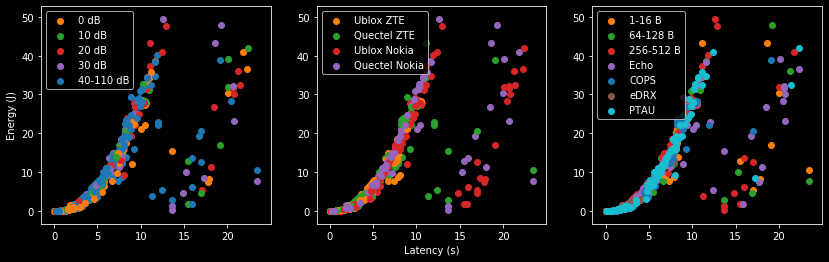

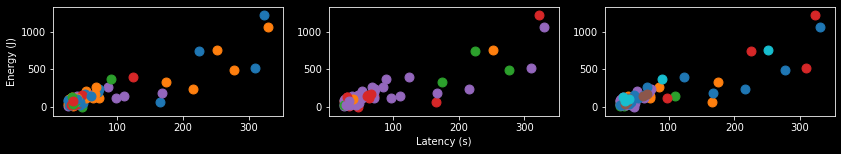

7 4 5
ky energy 1640 + 74 = 1714


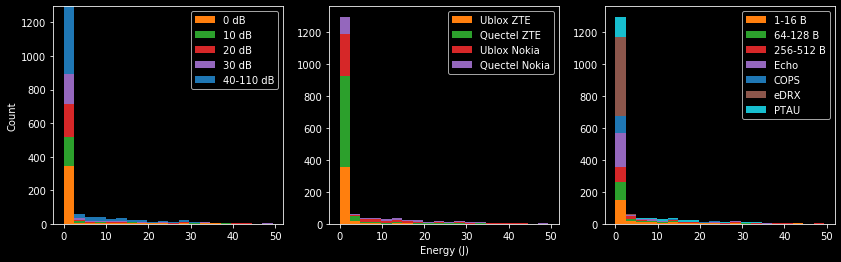

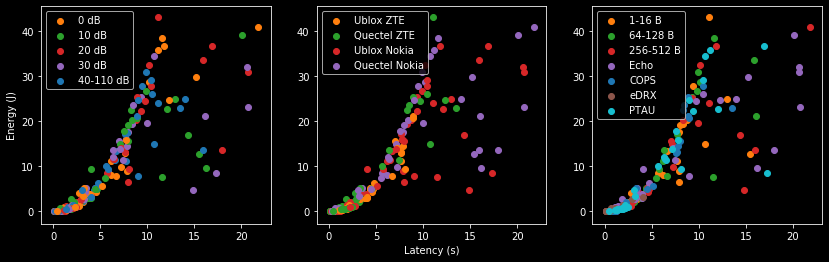

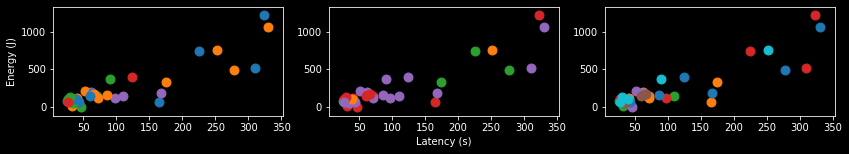

7 4 5
ky energy 225 + 38 = 263


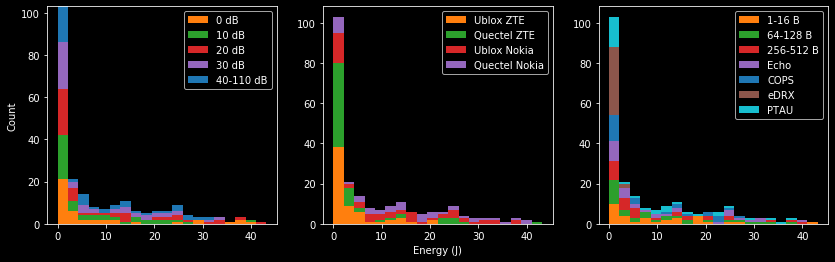

In [12]:
plot('txTime', 'energy', 'Latency (s)', 'Energy (J)', [1000,1000], [True, False])

custom jupyter @DanielRobinson


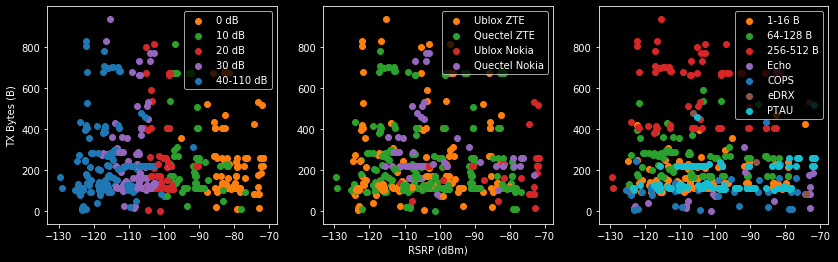

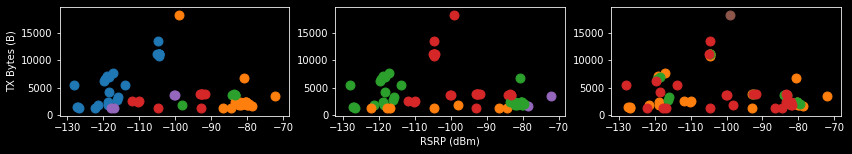

7 4 5
ky txBytes 457 + 65 = 522


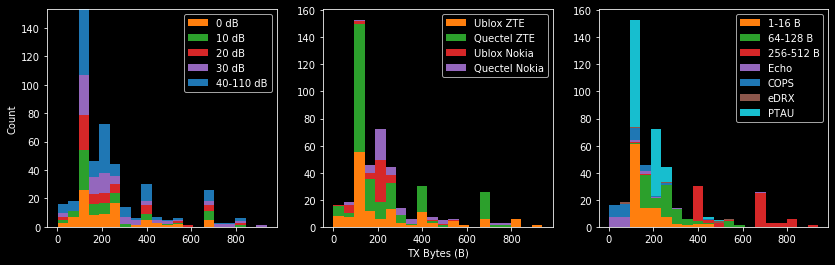

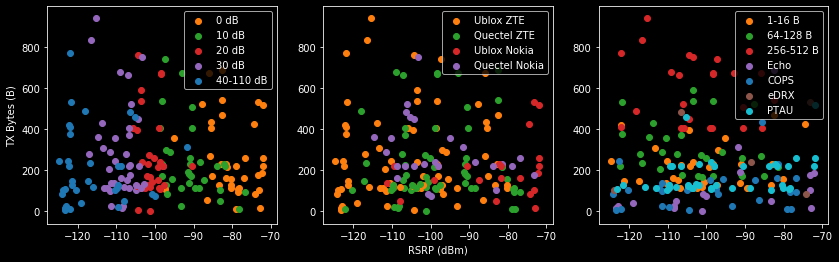

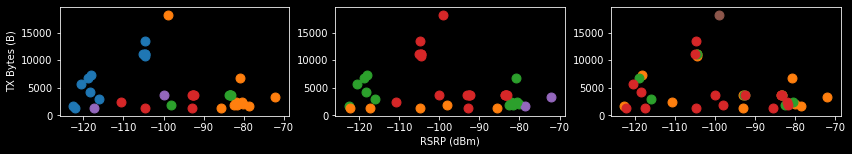

7 4 5
ky txBytes 174 + 37 = 211


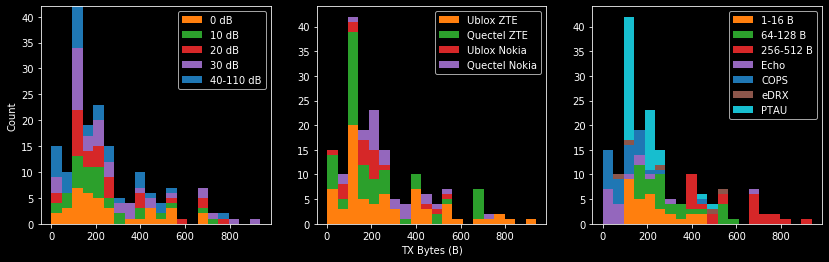

In [14]:
plot('Signal power', 'txBytes', 'RSRP (dBm)', 'TX Bytes (B)', scale=[10,1], invert=[False, True], K=3)